# VISUALISATIONS

Importing libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import json


df = pd.read_csv('cleaned_data.csv')

## Plots showing the outliers for the prices

Number of properties by price, we see that all the data stay on the left meaning there's a lot of outliers on the upper prices.

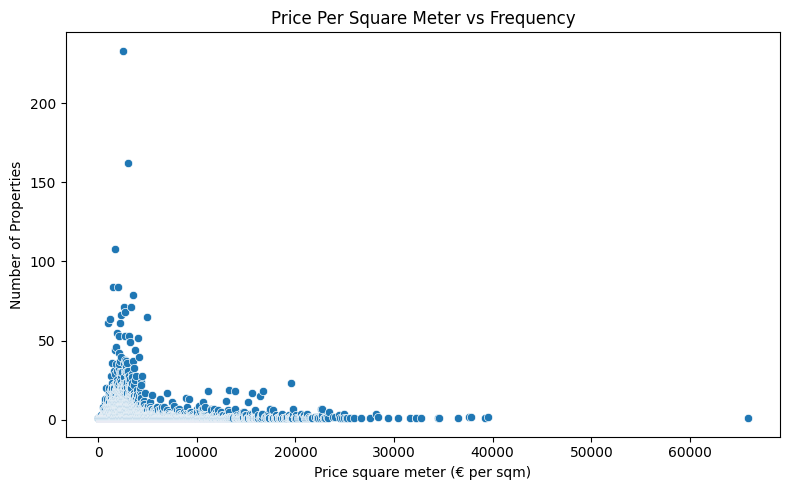

In [13]:
properties_with_outliers = pd.read_csv('cleaned_data_with_outliers.csv')
price_counts = (
    properties_with_outliers
    .groupby('price_square_meter')           # group rows by each unique price
    .size()                     # count how many rows per price
    .reset_index(name='count')  # turn it into a DataFrame with columns ['price','count']
)

#Plot scatter of price vs. count
plt.figure(figsize=(8,5))
sns.scatterplot(data=price_counts, x='price_square_meter', y='count')
plt.xlabel("Price square meter (€ per sqm)")
plt.ylabel("Number of Properties")
plt.title("Price Per Square Meter vs Frequency")
plt.tight_layout()
plt.show()



This graph show the subtype of house (as a type)

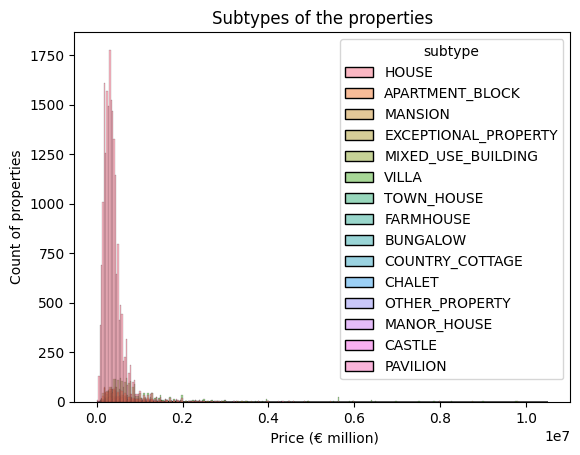

In [ ]:
# yes
properties = pd.read_csv("cleaned_data.csv")
houses = properties[properties["type"].isin(["HOUSE"])]
sns.histplot(data=houses, x="price", hue="subtype")
plt.title('Subtypes of the properties')
plt.ylabel("Count of properties")
plt.xlabel(" Price (€ million)")
plt.show()


This scatterplot shows the data repartition in regard of the bedroom count. We can see that a few dots (7) are outliers. 

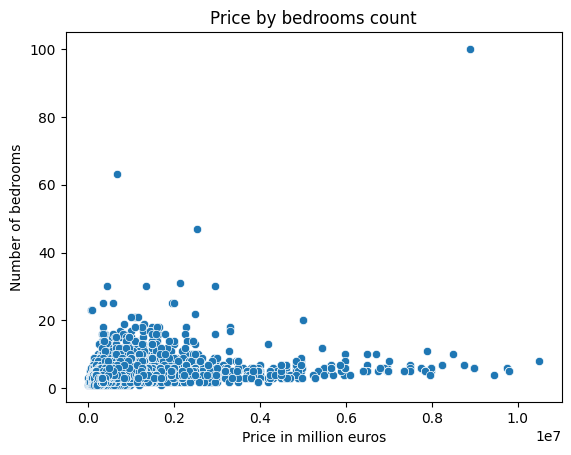

In [10]:
sns.scatterplot(data=properties_with_outliers, x="price", y="bedroomCount")
plt.title('Price by bedrooms count')
plt.ylabel("Number of bedrooms")
plt.xlabel("Price in million euros")
plt.show()

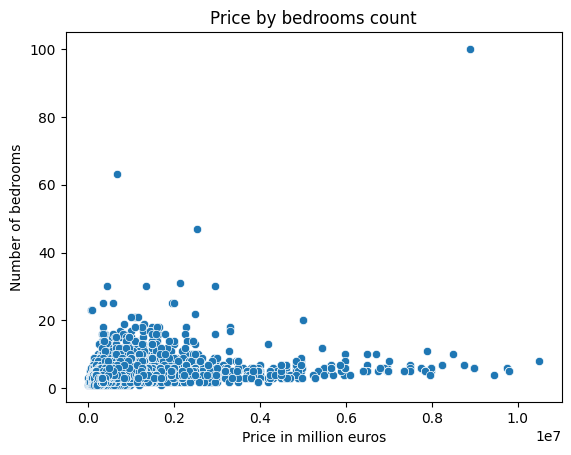

In [11]:
sns.scatterplot(data=properties_with_outliers, x="price", y="bedroomCount")
plt.title('Price by bedrooms count')
plt.ylabel("Number of bedrooms")
plt.xlabel("Price in million euros")
plt.show()

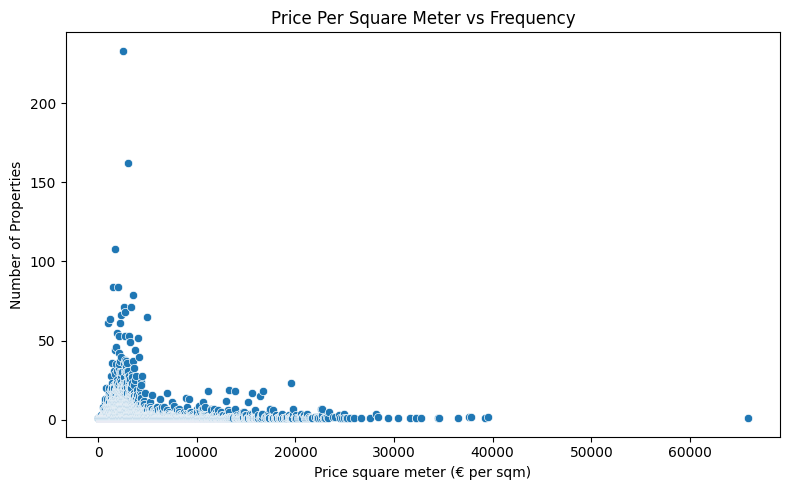

In [12]:
properties_with_outliers = pd.read_csv('cleaned_data_with_outliers.csv')
price_counts = (
    properties_with_outliers
    .groupby('price_square_meter')           # group rows by each unique price
    .size()                     # count how many rows per price
    .reset_index(name='count')  # turn it into a DataFrame with columns ['price','count']
)

#Plot scatter of price vs. count
plt.figure(figsize=(8,5))
sns.scatterplot(data=price_counts, x='price_square_meter', y='count')
plt.xlabel("Price square meter (€ per sqm)")
plt.ylabel("Number of Properties")
plt.title("Price Per Square Meter vs Frequency")
plt.tight_layout()
plt.show()